In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-dev20200212


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
train_labels = keras.utils.to_categorical(train_labels, len(class_names))
test_labels = keras.utils.to_categorical(test_labels, len(class_names))

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
train_images.shape

(60000, 28, 28, 1)

In [5]:
test_images.shape

(10000, 28, 28, 1)

In [6]:
train_labels.shape

(60000, 10)

In [7]:
test_labels.shape

(10000, 10)

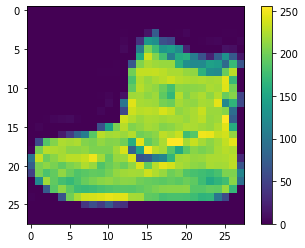

In [8]:
plt.figure()
plt.imshow(train_images[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
datagen = ImageDataGenerator(
  rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

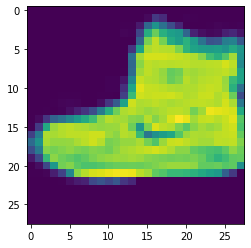

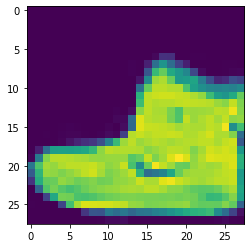

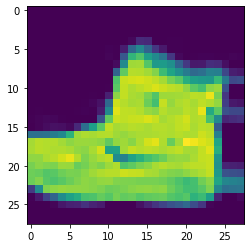

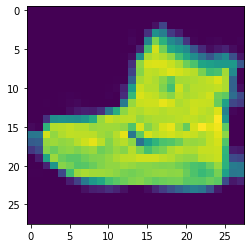

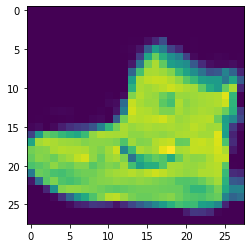

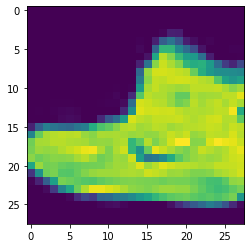

In [10]:
i = 0
data = train_images[0]
data = np.expand_dims(data, axis=0)
for batch in datagen.flow(data, batch_size=1):
    plt.figure(i)
    imfplot = plt.imshow(batch[0][:,:,0])
    i += 1
    if i % 6 == 0:
        break
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

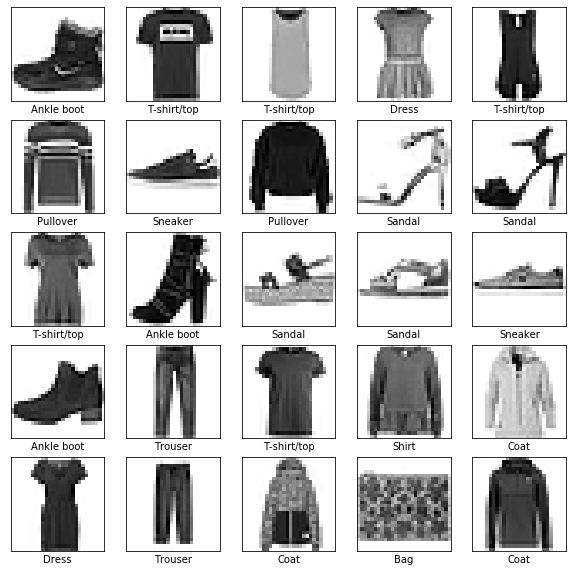

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(train_labels[i])])
plt.show()

In [13]:
tf.keras.backend.clear_session()

inputs = Input(shape=(28,28,1), name="Input")
h_0 = Flatten()(inputs)
h_1 = Dense(128, activation='relu', name="hidden_1")(h_0)
h_2 = Dense(128, activation='relu', name="hidden_2")(h_1)
predictions = Dense(10, activation='softmax', name="Output")(h_2)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 128)               100480    
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               16512     
_________________________________________________________________
Output (Dense)               (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
checkpoint = ModelCheckpoint('mnist-fashion.hdf5',
                            monitor='val_accuracy',
                            save_best_only=True,
                            verbose=1)

In [15]:
early_stopping_callback = EarlyStopping(monitor='val_accuracy', 
                                        min_delta=1e-7, 
                                        patience=20, 
                                        verbose=1, 
                                        mode='auto', 
                                        baseline=None, 
                                        restore_best_weights=True)

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.000001)

In [17]:
%%time
BATCH_SIZE = 1024
EPOCHS = 10000000000
history = model.fit(datagen.flow(train_images, train_labels, batch_size=BATCH_SIZE),
                   epochs = EPOCHS,
                   validation_data=(test_images, test_labels),
                   steps_per_epoch=train_images.shape[0] // BATCH_SIZE,
                   verbose=1,
                   callbacks=[checkpoint, learning_rate_reduction, early_stopping_callback])

  ...
    to  
  ['...']
Train for 58 steps, validate on 10000 samples
Epoch 1/10000000000
57/58 [============================>.] - ETA: 0s - loss: 1.1053 - accuracy: 0.6089
Epoch 00001: val_accuracy improved from -inf to 0.74320, saving model to mnist-fashion.hdf5
58/58 [==============================] - 11s 188ms/step - loss: 1.1010 - accuracy: 0.6099 - val_loss: 0.6972 - val_accuracy: 0.7432
Epoch 2/10000000000
57/58 [============================>.] - ETA: 0s - loss: 0.7521 - accuracy: 0.7233
Epoch 00002: val_accuracy improved from 0.74320 to 0.77570, saving model to mnist-fashion.hdf5
58/58 [==============================] - 11s 185ms/step - loss: 0.7518 - accuracy: 0.7232 - val_loss: 0.6199 - val_accuracy: 0.7757
Epoch 3/10000000000
57/58 [============================>.] - ETA: 0s - loss: 0.6878 - accuracy: 0.7509
Epoch 00003: val_accuracy improved from 0.77570 to 0.78360, saving model to mnist-fashion.hdf5
58/58 [==============================] - 11s 186ms/step - loss: 0.6869 - a

Epoch 26/10000000000
57/58 [============================>.] - ETA: 0s - loss: 0.4693 - accuracy: 0.8262
Epoch 00026: val_accuracy improved from 0.84530 to 0.84800, saving model to mnist-fashion.hdf5
58/58 [==============================] - 11s 192ms/step - loss: 0.4696 - accuracy: 0.8263 - val_loss: 0.4209 - val_accuracy: 0.8480
Epoch 27/10000000000
57/58 [============================>.] - ETA: 0s - loss: 0.4672 - accuracy: 0.8251
Epoch 00027: val_accuracy did not improve from 0.84800
58/58 [==============================] - 11s 188ms/step - loss: 0.4674 - accuracy: 0.8252 - val_loss: 0.4202 - val_accuracy: 0.8471
Epoch 28/10000000000
57/58 [============================>.] - ETA: 0s - loss: 0.4665 - accuracy: 0.8268
Epoch 00028: val_accuracy improved from 0.84800 to 0.84840, saving model to mnist-fashion.hdf5
58/58 [==============================] - 11s 186ms/step - loss: 0.4665 - accuracy: 0.8267 - val_loss: 0.4164 - val_accuracy: 0.8484
Epoch 29/10000000000
57/58 [===================

Epoch 52/10000000000
57/58 [============================>.] - ETA: 0s - loss: 0.4531 - accuracy: 0.8321
Epoch 00052: val_accuracy did not improve from 0.85250
58/58 [==============================] - 11s 185ms/step - loss: 0.4525 - accuracy: 0.8324 - val_loss: 0.4069 - val_accuracy: 0.8521
Epoch 53/10000000000
57/58 [============================>.] - ETA: 0s - loss: 0.4531 - accuracy: 0.8317
Epoch 00053: val_accuracy did not improve from 0.85250
58/58 [==============================] - 11s 192ms/step - loss: 0.4527 - accuracy: 0.8318 - val_loss: 0.4073 - val_accuracy: 0.8518
Epoch 54/10000000000
57/58 [============================>.] - ETA: 0s - loss: 0.4493 - accuracy: 0.8341
Epoch 00054: val_accuracy did not improve from 0.85250

Epoch 00054: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
58/58 [==============================] - 11s 187ms/step - loss: 0.4499 - accuracy: 0.8340 - val_loss: 0.4071 - val_accuracy: 0.8521
Epoch 55/10000000000
57/58 [==================

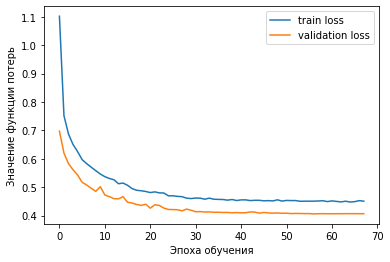

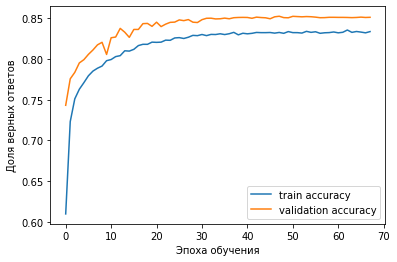

In [18]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции потерь')
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

plt.show()